## Author-Rohan Rathi

## Wine Quality Prediction

Wine quality prediction is a common application of machine learning and data analysis in the field of viticulture and wine production. It involves using data about various attributes of wine, such as its chemical composition, acidity, sugar content, and more, to predict the quality of the wine. Wine quality is often rated on a numerical scale, and machine learning models can be used to predict these ratings or categorize wines into quality classes.

Keep in mind that the quality of predictions is highly dependent on the quality and quantity of the data, the choice of features, and the selection of the appropriate machine learning algorithm. Wine quality prediction can be a fun and useful application in the field of wine production and can help winemakers make informed decisions about improving their products.

Dataset-https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Reading the Dataset

In [3]:
wine_quality = pd.read_csv('winequality-red.csv')

In [5]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_quality.shape

(1599, 12)

In [18]:
# Checking for null values
wine_quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Now, We will check for duplicates
wine_quality.duplicated().sum()

In [14]:
wine_quality.drop_duplicates(inplace=True)

In [15]:
wine_quality.shape

(1359, 12)

Now, we can see that count is decreased from 1599 to 1359 since duplicates are removed

In [17]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Visualization

In [21]:
wine_quality.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


Text(0.5, 1.0, 'Correlation Heatmap')

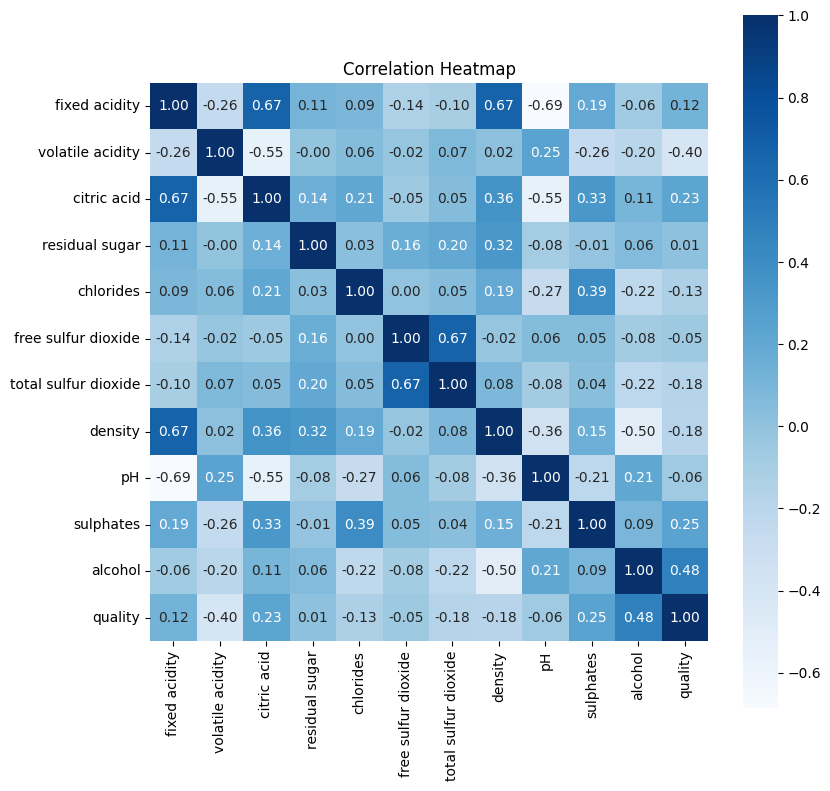

In [22]:
corr_data = wine_quality.corr()
plt.figure(figsize = (9, 9))
sns.heatmap(corr_data, cbar = True, square= True, annot=True, fmt= '.2f',  cmap='Blues')
plt.title('Correlation Heatmap')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

Text(0.5, 1.0, 'Number of wines in each quality category')

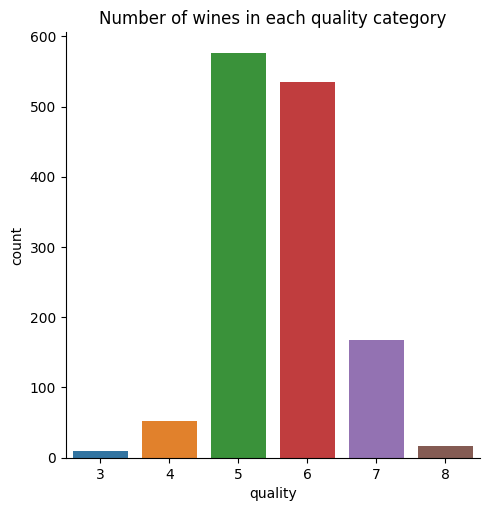

In [23]:
# Number of wines in each quality category
sns.catplot(x='quality',  data=wine_quality, kind='count')
plt.title('Number of wines in each quality category')


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='quality', ylabel='volatile acidity'>

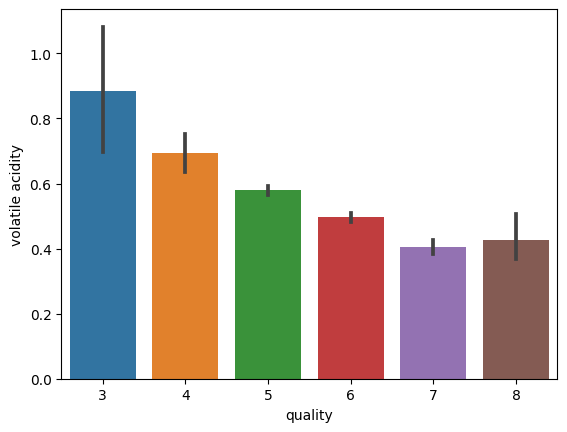

In [24]:
# plotting a barplot for quality vs volatile acidity
sns.barplot(x = 'quality', y= 'volatile acidity', data = wine_quality)

Here, we can say that as quality increases, the volatile acidity decreases.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='quality', ylabel='alcohol'>

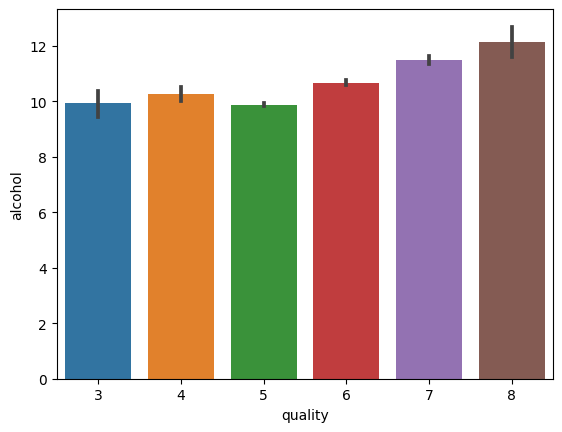

In [25]:
# plotting a barplot for quality vs alcohol
sns.barplot(x = 'quality', y = 'alcohol', data = wine_quality)

Here, we can say that as the quality increases the content of alcohol also increases.

In [28]:
X = wine_quality.drop('quality', axis= 1)
y = wine_quality['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

The code separates the wine dataset into two parts:

'X' contains the features or attributes of the wines, excluding the quality ratings.
'y' is a binary target variable that classifies wines as either high-quality (1) or lower-quality (0) based on a threshold of 7 for their quality ratings. This data preparation is typically done when you want to perform binary classification tasks, such as predicting whether a wine is of high quality or not based on its characteristics.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 3)

The code  provided is used for splitting the data into training and testing sets.

In [30]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

The code provided is used to create an instance of a Random Forest classifier model. Once execute this code, we will have a Random Forest classifier model stored in the 'model' variable, ready for training and prediction tasks. We can train this model using your training data and then use it to make predictions on new or test data.

In [35]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

The code is used to train the machine learning model.

In [36]:
from sklearn.metrics import accuracy_score
#accuracy on test data
X_test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, X_test_preds)

The provided code is used to calculate the accuracy of machine learning model on the test data. It utilizes the 'accuracy_score' function from scikit-learn to assess the model's performance.

In [37]:
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))

Test accuracy: 88.60%


## Thankyou!!